<a href="https://colab.research.google.com/github/SalmenzarZV/Forest_Heart/blob/main/Forest_Corazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import pydot

from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from IPython.display import Image
from io import StringIO
from joblib import dump, load

Mounted at /content/drive


# PREPROCESO

###### - IMPORTACION DE LOS DATOS DEL DATASET

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/IABD/datasets/heart.csv')
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# Aqui nos damos cuenta de que hay ciertos datos que deben de ser limpiados porque son negativos
heart_df.drop(heart_df[heart_df.Oldpeak < 0].index, inplace=True)

# Tambien es necesario transformar los datos categoricos a datos numericos
le = preprocessing.LabelEncoder()
heart_df['Sex'] = le.fit_transform(heart_df.Sex.values)
heart_df['ChestPainType'] = le.fit_transform(heart_df.ChestPainType.values)
heart_df['RestingECG'] = le.fit_transform(heart_df.RestingECG.values)
heart_df['ExerciseAngina'] = le.fit_transform(heart_df.ExerciseAngina.values)
heart_df['ST_Slope'] = le.fit_transform(heart_df.ST_Slope.values)
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


###### - PRIMERAS Y ÚLTIMAS FILAS DEL DATAFRAME IMPORTADO

In [ ]:
# primeras filas
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
# ultimas filas
heart_df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


###### - PARÁMETROS ESTADÍSTICOS DE LOS DATOS

In [ ]:
heart_df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,53.530387,0.786740,0.777901,132.659669,201.477348,0.227624,0.984530,136.988950,0.406630,0.914254,1.362431,0.551381
std,9.426557,0.409836,0.953776,18.477599,107.719891,0.419531,0.630865,25.330337,0.491476,1.046944,0.605216,0.497628
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,177.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,268.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


###### - MAPA DE CALOR DE LA CORRELACIÓN ENTRE VARIABLES

<AxesSubplot:>

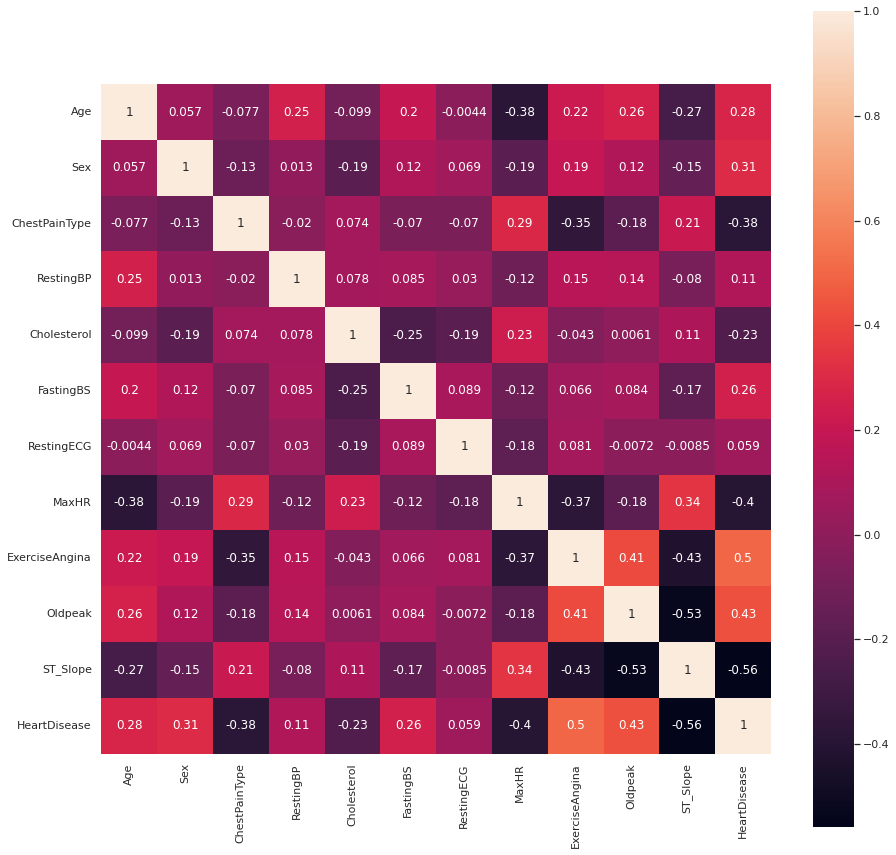

In [ ]:
sns.set()
plt.figure(figsize = (15,15))
# fmt=".1f" ---> decimales a los que quieres redondear
sns.heatmap(heart_df.corr(), square=True, annot=True)

###### - SELECCIÓN DE CARACTERÍSTICAS A TENER EN CUENTA EN EL ESTUDIO

In [ ]:
# ELIMINACION DE CARACTERISTICAS QUE NO SE TENDRAN EN CUENTA
heart_df = heart_df.drop('ST_Slope', axis=1)
heart_df = heart_df.drop('ExerciseAngina', axis=1)
heart_df = heart_df.drop('ChestPainType', axis=1)
heart_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,HeartDisease
0,40,1,140,289,0,1,172,0.0,0
1,49,0,160,180,0,1,156,1.0,1
2,37,1,130,283,0,2,98,0.0,0
3,48,0,138,214,0,1,108,1.5,1
4,54,1,150,195,0,1,122,0.0,0
...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,1.2,1
914,68,1,144,193,1,1,141,3.4,1
915,57,1,130,131,0,1,115,1.2,1
916,57,0,130,236,0,0,174,0.0,1


###### - SEPARACIÓN ENTRE DATOS DE ENTRADA Y ETIQUETAS

In [ ]:
input_heart = heart_df.drop('HeartDisease', axis=1)
output_heart = heart_df['HeartDisease'] 

In [ ]:
input_heart

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak
0,40,1,140,289,0,1,172,0.0
1,49,0,160,180,0,1,156,1.0
2,37,1,130,283,0,2,98,0.0
3,48,0,138,214,0,1,108,1.5
4,54,1,150,195,0,1,122,0.0
...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,1,132,1.2
914,68,1,144,193,1,1,141,3.4
915,57,1,130,131,0,1,115,1.2
916,57,0,130,236,0,0,174,0.0


In [ ]:
output_heart

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 905, dtype: int64

# ENTRENAMIENTO Y PREDICCIÓN

###### - ELECCIÓN, INSTANCIACIÓN Y ENTRENAMIENTO DEL MODELO

In [ ]:
def cross_validation(model):
  results = []
  for train_fold, test_fold in kf.split(input_heart):
    # Declaramos los datos de entrada y las etiquetas de test o entrenamiento
    input_heart_train = input_heart.iloc[train_fold]
    input_heart_test = input_heart.iloc[test_fold]
    output_heart_train = output_heart.iloc[train_fold]
    output_heart_test = output_heart.iloc[test_fold]

    # Entrenamiento y evaluacion del modelo
    model.fit(input_heart_train, output_heart_train)
    prediction = model.predict(input_heart_test)
    result = accuracy_score(output_heart_test, prediction)
    # Añadimos a la lista de resultados para su posterior media
    results.append(result)
  return np.mean(results)

In [ ]:
kf = KFold(n_splits=4) # Vamos a usar 4 pliegues
l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


total_scores_gini = []
total_scores_entropy = []
for estimators in l_estimators:
  fold_accuracy = []
  # instanciacion del modelo gini
  forest_model = RandomForestClassifier(n_estimators=estimators, criterion='gini', random_state=0)
  total_scores_gini.append(cross_validation(forest_model))

  # instanciacion del modelo entropy
  forest_model = RandomForestClassifier(n_estimators=estimators, criterion='entropy', random_state=0)
  total_scores_entropy.append(cross_validation(forest_model))

# EVALUACIÓN

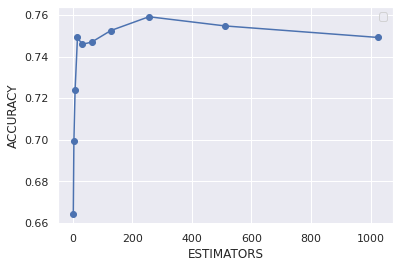

In [ ]:
# Mostramos una gráfica comparando el rendimiento con el número de estimadores usando el criterion gini.
plt.plot(l_estimators, total_scores_gini, marker='o')
plt.ylabel('ACCURACY')
plt.xlabel('ESTIMATORS')
plt.legend()
plt.show()

In [ ]:
# Elegimos los marámetros más óptimos
best_est_gini = l_estimators[np.argmax(total_scores_gini)]
best_accuracy_gini = max(total_scores_gini)
print('Mejor estimador Gini:', best_est_gini)
print('Mejor resultado Gini:', best_accuracy_gini)

Mejor estimador Gini: 256
Mejor resultado Gini: 0.7591370706795058


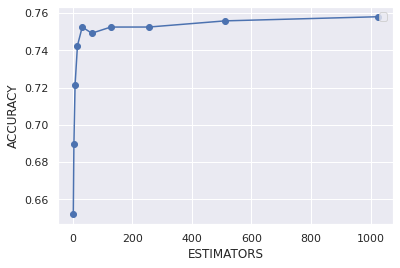

In [ ]:
# Mostramos una gráfica comparando el rendimiento con el número de estimadores usando el criterion entropy.
plt.plot(l_estimators, total_scores_entropy, marker='o')
plt.ylabel('ACCURACY')
plt.xlabel('ESTIMATORS')
plt.legend()
plt.show()

In [ ]:
# Elegimos los marámetros más óptimos
best_est_entropy = l_estimators[np.argmax(total_scores_entropy)]
best_accuracy_entropy = max(total_scores_entropy)
print('Mejor estimador Entropy:', best_est_entropy)
print('Mejor resultado Entropy:', best_accuracy_entropy)

Mejor estimador Entropy: 1024
Mejor resultado Entropy: 0.7580308759892401


In [ ]:
# Comparamos los resultados entre Gini y Entropy
best_est = best_est_entropy if best_accuracy_entropy > best_accuracy_gini else best_est_gini
best_criterion = 'entropy' if best_accuracy_entropy > best_accuracy_gini else 'gini'
print('Mejor criterion:', best_criterion)
# Reentrenamos con los mejores parámetros
forest_model =  RandomForestClassifier(n_estimators=best_est, criterion=best_criterion, random_state=0)

# separamos entre datos de entrada y de salida
input_heart_train, input_heart_test, output_heart_train, output_heart_test = train_test_split(input_heart, output_heart, random_state=1, train_size=0.80)

# entrenamos el modelo
forest_model.fit(input_heart_train, output_heart_train)
prediction = forest_model.predict(input_heart_test)

# evaluamos
accuracy_score(output_heart_test, prediction)

Mejor criterion: gini


0.8066298342541437

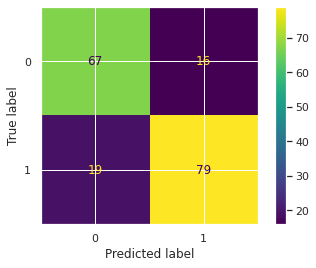

In [ ]:
# Mostramos la matriz de confusion
ConfusionMatrixDisplay.from_predictions(output_heart_test, prediction)

In [ ]:
# Mostramos la importancia de cada característica
pd.DataFrame({'Attributes': tuple(input_heart.keys()), 'Decission Tree': forest_model.feature_importances_})

,Attributes,Decission Tree
0,Age,0.150083
1,Sex,0.062509
2,RestingBP,0.116008
3,Cholesterol,0.188446
4,FastingBS,0.035819
5,RestingECG,0.034663
6,MaxHR,0.206717
7,Oldpeak,0.205755


# OPTIMIZACIÓN

###### - OPTIMIZAMOS LOS HIPERPARÁMETROS CON GRIDSEARCH

In [ ]:
# separamos entre datos de entrada y de salida
input_heart_train, input_heart_test, output_heart_train, output_heart_test = train_test_split(input_heart, output_heart, random_state=1, train_size=0.80)

# Reseteamos el indice de los datos de entrada
input_heart_train.reset_index(drop=True, inplace=True)
output_heart_train.reset_index(drop=True, inplace=True)

# estructura de datos con los parámetros
param_dist = {
    'n_estimators': [32, 64, 128, 256],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [8, 4, 2],
    'bootstrap': [True, False],
}
# modelo
forest_model = RandomForestClassifier(random_state=0)
# Construccion del buscador
grid = GridSearchCV(estimator=forest_model, param_grid=param_dist, cv=4, n_jobs=-1)
# entrenamiento
grid.fit(input_heart_train, output_heart_train)
# Resultado
best_grid = grid.best_estimator_
best_grid

RandomForestClassifier(max_depth=8, n_estimators=256, random_state=0)

In [ ]:
# entrenamos el mejor estimator y predecimos
best_grid.fit(X=input_heart_train, y=output_heart_train)
prediction = best_grid.predict(input_heart_test)
# comprobamos la precision
accuracy_score(output_heart_test, prediction)

0.8121546961325967

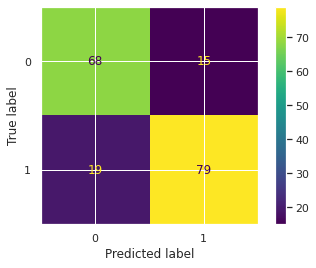

In [ ]:
# Mostramos la matriz de confusion
ConfusionMatrixDisplay.from_predictions(output_heart_test, prediction)

In [ ]:
# Mostramos la importancia de cada característica
pd.DataFrame({'Attributes': tuple(input_heart.keys()), 'Decission Tree': best_grid.feature_importances_})

,Attributes,Decission Tree
0,Age,0.128723
1,Sex,0.079014
2,RestingBP,0.093879
3,Cholesterol,0.177308
4,FastingBS,0.043152
5,RestingECG,0.027954
6,MaxHR,0.201729
7,Oldpeak,0.248241
